# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

units = "metric"

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | novo cruzeiro
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | kingston
Processing Record 6 of Set 1 | minas de marcona
Processing Record 7 of Set 1 | zangguy
City not found. Skipping...
Processing Record 8 of Set 1 | faya-largeau
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | hauterive
Processing Record 14 of Set 1 | lerwick
Processing Record 15 of Set 1 | sai buri
Processing Record 16 of Set 1 | kone
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Se

Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | kayangel
Processing Record 42 of Set 4 | la reforma
Processing Record 43 of Set 4 | tolanaro
Processing Record 44 of Set 4 | klyuchi
Processing Record 45 of Set 4 | afaahiti
Processing Record 46 of Set 4 | wailua homesteads
Processing Record 47 of Set 4 | brigantine
Processing Record 48 of Set 4 | chichiriviche
Processing Record 49 of Set 4 | kota kinabalu
Processing Record 0 of Set 5 | gadzhiyevo
Processing Record 1 of Set 5 | tulun
Processing Record 2 of Set 5 | pontevedra
Processing Record 3 of Set 5 | suva
Processing Record 4 of Set 5 | teotitlan
Processing Record 5 of Set 5 | yuzhno-kurilsk
Processing Record 6 of Set 5 | nizhniy kuranakh
Processing Record 7 of Set 5 | khoyniki
Processing Record 8 of Set 5 | kauhajoki
Processing Record 9 of Set 5 | zouerate
Processing Record 10 of Set 5 | bulgan
Processing Record 11 of Set 5 | seven pagodas
Processing Record 12 of Set 5 | crane
Processing Record 13 of Set 

Processing Record 34 of Set 8 | sandnessjoen
Processing Record 35 of Set 8 | humahuaca
Processing Record 36 of Set 8 | talavera de la reina
Processing Record 37 of Set 8 | patong
Processing Record 38 of Set 8 | borgarnes
Processing Record 39 of Set 8 | jijiga
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | akureyri
Processing Record 42 of Set 8 | ribeirao das neves
Processing Record 43 of Set 8 | soio
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | ordynskoye
Processing Record 46 of Set 8 | huaidian
Processing Record 47 of Set 8 | san luis de la loma
Processing Record 48 of Set 8 | arraial do cabo
Processing Record 49 of Set 8 | sao gabriel da cachoeira
Processing Record 0 of Set 9 | nabire
Processing Record 1 of Set 9 | red oak
Processing Record 2 of Set 9 | darovskoy
Processing Record 3 of Set 9 | tuni
Processing Record 4 of Set 9 | jayapura
Processing Record 5 of Set 9 | cheremukhovo
Processing Record 6

Processing Record 21 of Set 12 | nikolayevsk-on-amure
Processing Record 22 of Set 12 | chitapur
Processing Record 23 of Set 12 | higuera de zaragoza
Processing Record 24 of Set 12 | villa gesell
Processing Record 25 of Set 12 | ar ruways
Processing Record 26 of Set 12 | greenville
Processing Record 27 of Set 12 | carnarvon
Processing Record 28 of Set 12 | zvishavane
Processing Record 29 of Set 12 | karangampel
Processing Record 30 of Set 12 | gorontalo
Processing Record 31 of Set 12 | masaurhi buzurg
Processing Record 32 of Set 12 | chernyshevskiy
Processing Record 33 of Set 12 | manado
Processing Record 34 of Set 12 | shingu
Processing Record 35 of Set 12 | chivilcoy
Processing Record 36 of Set 12 | yuksekova
Processing Record 37 of Set 12 | kete krachi
Processing Record 38 of Set 12 | lib
Processing Record 39 of Set 12 | sao tome
Processing Record 40 of Set 12 | sisimiut
Processing Record 41 of Set 12 | twon-brass
Processing Record 42 of Set 12 | bazarnyy karabulak
Processing Record 

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novo cruzeiro,-17.4681,-41.8753,16.76,95,100,1.75,BR,1682118305
1,jamestown,42.0970,-79.2353,18.62,69,0,4.12,US,1682118144
2,hamilton,39.1834,-84.5333,15.50,90,100,8.75,US,1682118028
3,constantia,44.1833,28.6500,7.61,87,12,5.58,RO,1682118307
4,kingston,17.9970,-76.7936,27.53,79,75,3.60,JM,1682118169


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novo cruzeiro,-17.4681,-41.8753,16.76,95,100,1.75,BR,1682118305
1,jamestown,42.0970,-79.2353,18.62,69,0,4.12,US,1682118144
2,hamilton,39.1834,-84.5333,15.50,90,100,8.75,US,1682118028
3,constantia,44.1833,28.6500,7.61,87,12,5.58,RO,1682118307
4,kingston,17.9970,-76.7936,27.53,79,75,3.60,JM,1682118169


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

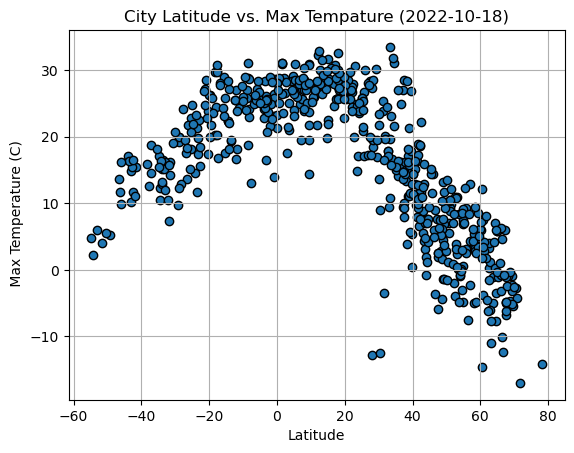

In [65]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values,
                      edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel(" Max Temperature (C)")
plt.title("City Latitude vs. Max Tempature (2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

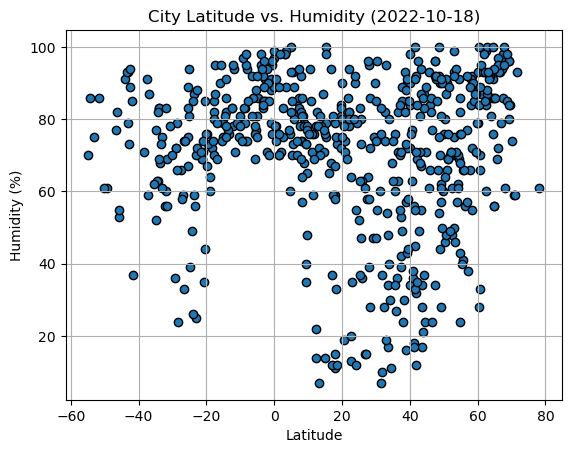

In [66]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values,
                      edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

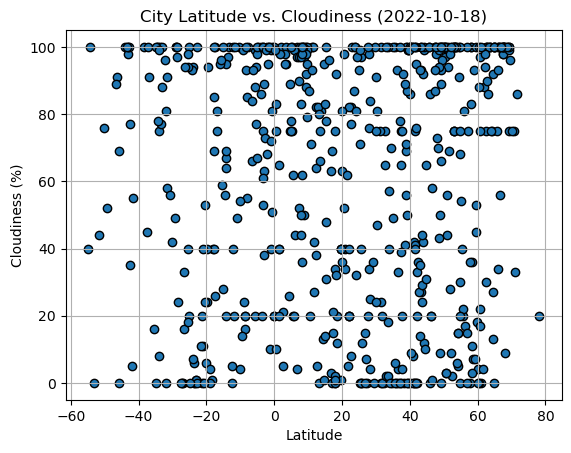

In [67]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values,
                      edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

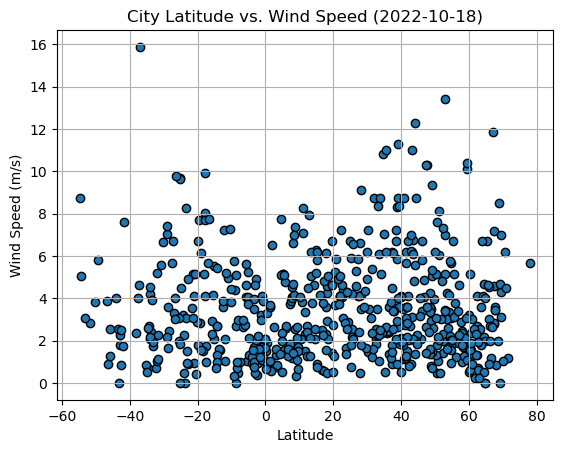

In [68]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values,
           edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [169]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
   

In [170]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,18.62,69,0,4.12,US,1682118144
2,hamilton,39.1834,-84.5333,15.50,90,100,8.75,US,1682118028
3,constantia,44.1833,28.6500,7.61,87,12,5.58,RO,1682118307
4,kingston,17.9970,-76.7936,27.53,79,75,3.60,JM,1682118169
6,faya-largeau,17.9257,19.1043,30.00,11,0,2.33,TD,1682118309


In [171]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novo cruzeiro,-17.4681,-41.8753,16.76,95,100,1.75,BR,1682118305
5,minas de marcona,-15.2119,-75.1103,17.62,79,28,5.50,PE,1682118308
8,port-aux-francais,-49.3500,70.2167,5.20,61,52,5.79,TF,1682118309
13,kone,-21.0595,164.8658,28.55,71,11,0.92,NC,1682118311
14,adamstown,-25.0660,-130.1015,24.81,81,100,9.69,PN,1682118312


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7512689302553129


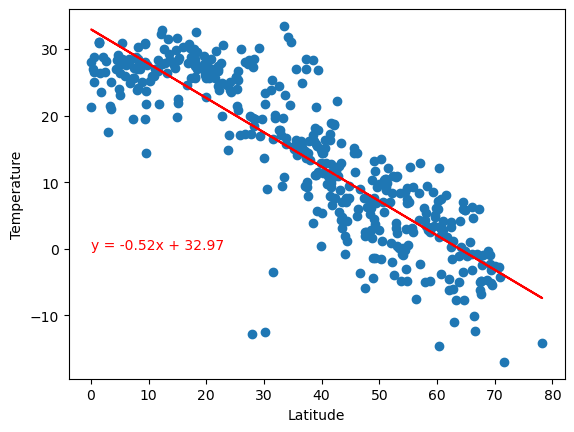

In [189]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0,0), color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5915192019521461


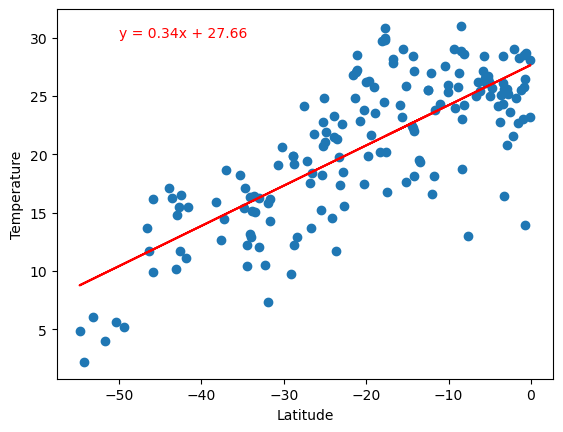

In [190]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,30), color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The closer to 0 latitude the higher the tempatures

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.010601063392367932


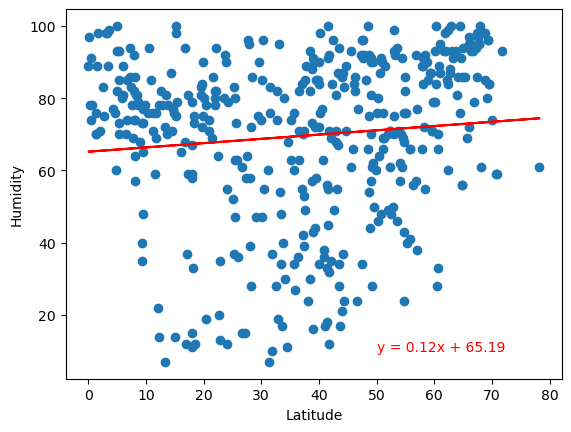

In [193]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (50,10), color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.13392214997161275


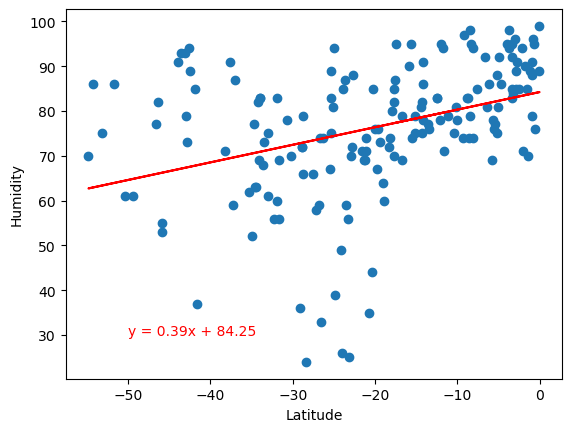

In [194]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,30), color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The higher the latitide the higher the humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004922696833774685


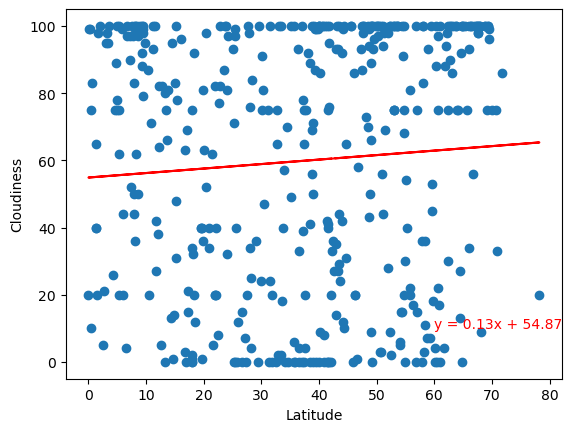

In [198]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60,10), color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0053556188628333


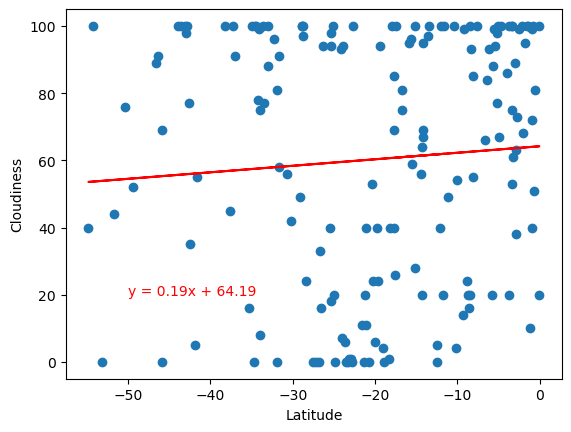

In [200]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,20), color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The higher the latitude the more cloudiness there is.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0004072342513949606


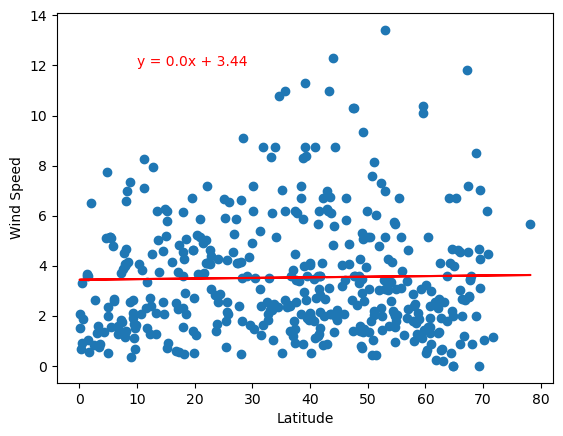

In [201]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,12), color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.020987143989295753


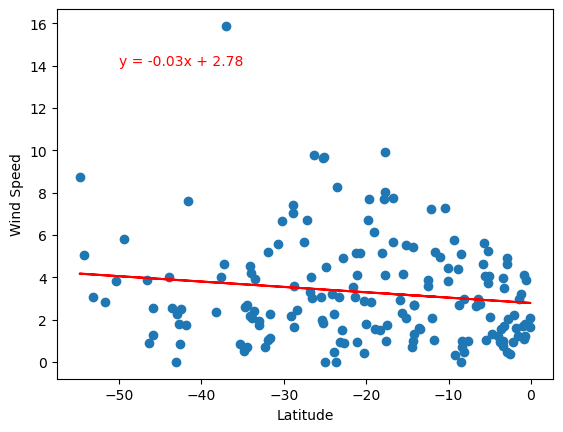

In [204]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,14), color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is not a lot of change in wind speed but there is a slight increase as you get away for 0 latitude